<a href="https://colab.research.google.com/github/VOL-EM2024/mo/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия

##Выбор и исключение переменных

Загрузите набор данных из файла ```Regressions datasets``` в соответствии с вашим вариантом (о смене датасета - индивидуально)

In [1]:
!pip install datasets seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
from datasets import load_dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/content/vgsales.csv')
df #чтение файла

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Предварительный анализ

1. Выбрать целевую переменную Y (Y - числоая переменная для задачи регрессии)
2. С помощью EDA (см практика) отобрать признаки, которые влияют на Y (можно определить гарфически, можно числами).
3. Обработать пропуски, при необходимости почистить от выбросов (тут важное замечание - не все выбросы это плохо)
4. Обосновать выбор переменных для исследования (корреляция, различия по классам, и так далее)

P.S. Важное замечание, слишком уникальные признаки (имена людей, названия город, ID юзера или чего-то еще - не берем, так как они не влияют на целевую переменную, а если и влияет, то это случайно)

<ipython-input-4-2acd47ba659a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

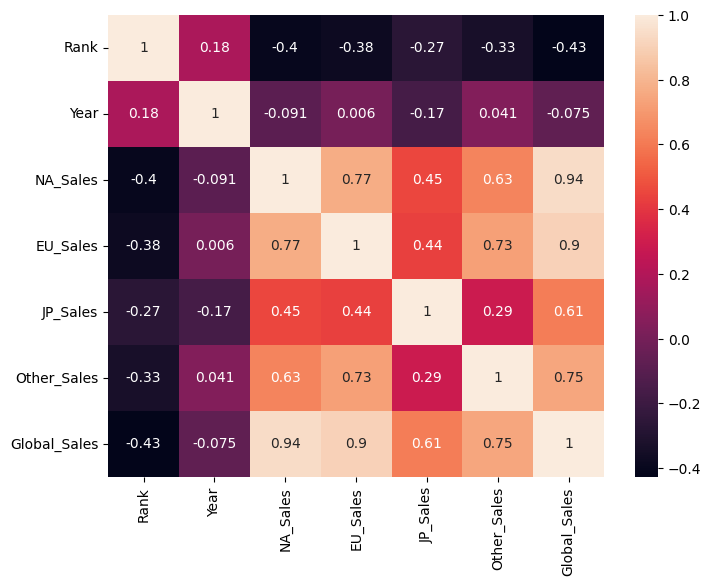

In [4]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)

Тут можно увидеть, что первые 2. столбца для нас вообще не информативны
А взор наш привлекает последний столбец, он более белый( приближен к 1)

In [5]:
# Разделение на обучающую и тестовую выборку
X = df
y = df.Global_Sales # целевая переменная
X = X.drop('Global_Sales', axis=1) # признаки для исследования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train, y_test # 13278 строк на оубчение и 3320 строк на валидацию


(14303    0.03
 13455    0.04
 6724     0.25
 898      1.92
 8484     0.16
          ... 
 11284    0.08
 11964    0.07
 5390     0.34
 860      1.97
 15795    0.02
 Name: Global_Sales, Length: 13278, dtype: float64,
 8928     0.15
 4789     0.40
 15492    0.02
 14767    0.03
 5211     0.36
          ... 
 4100     0.48
 833      2.04
 15702    0.02
 10279    0.11
 10854    0.09
 Name: Global_Sales, Length: 3320, dtype: float64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


у нас все гуд, целыз 3 переменные не числовые)

In [7]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns # выбираем числвоые колонки
cat_columns  = df.select_dtypes(include=['category']).columns # выбираем категориальные колонки

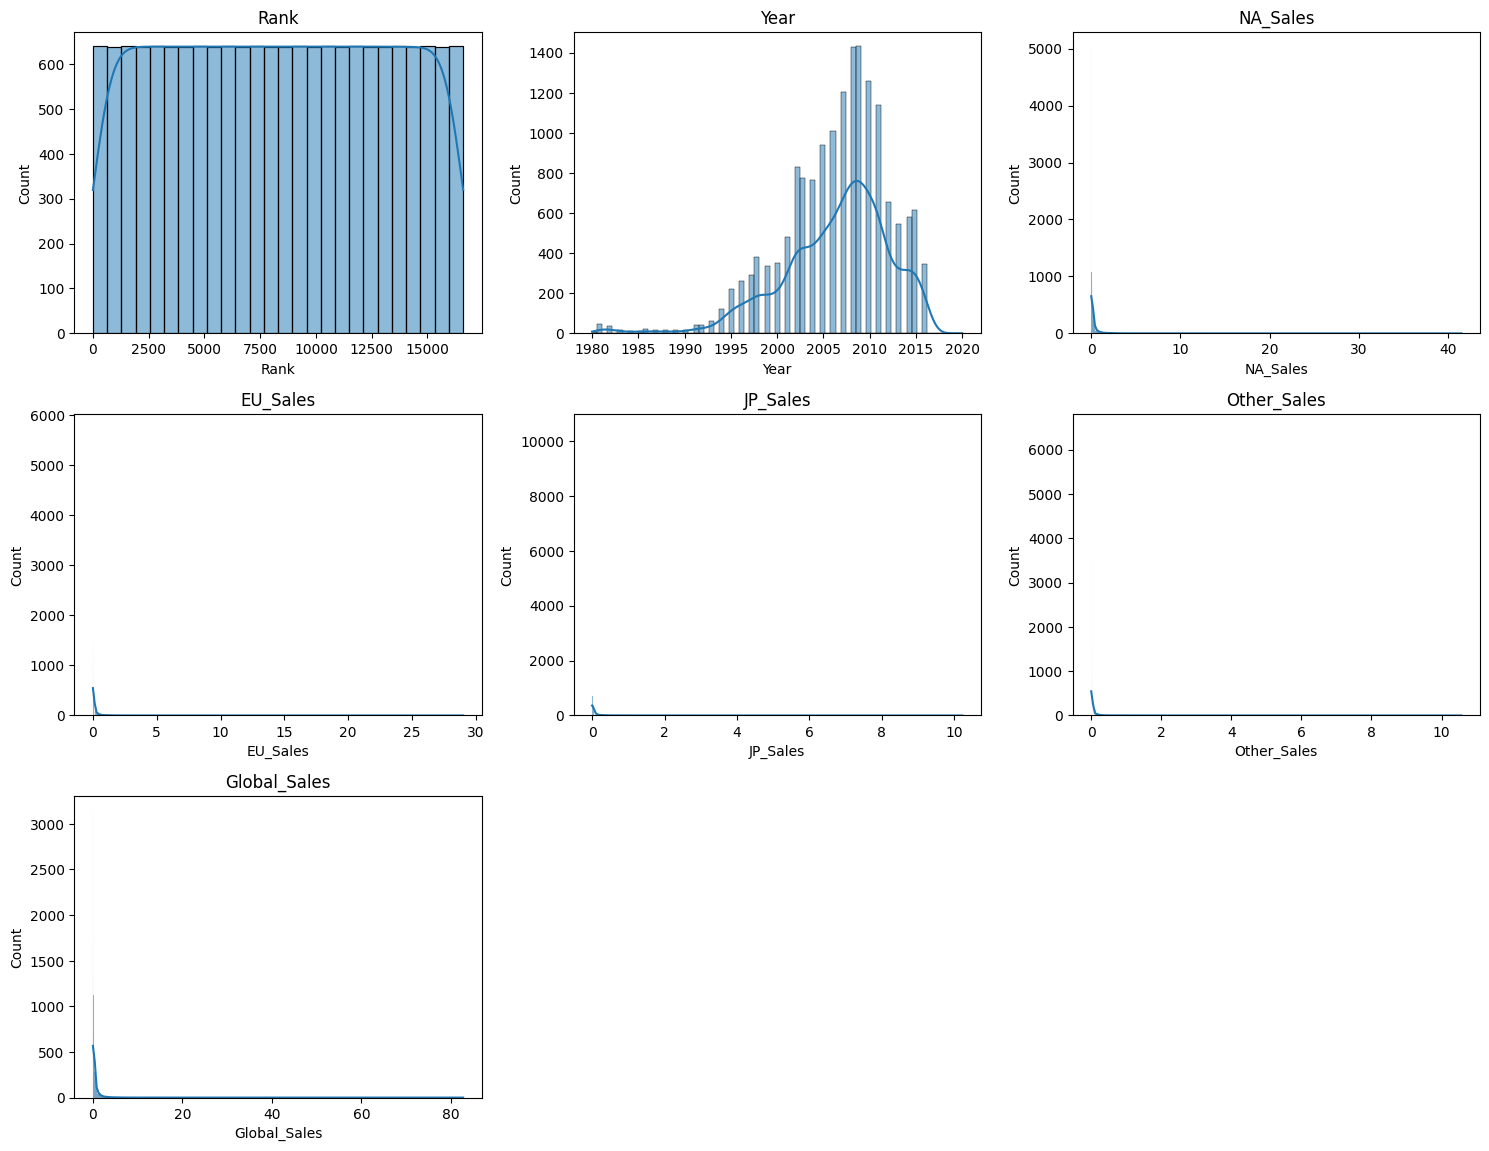

In [8]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

Даже не знаю как это комментиовать

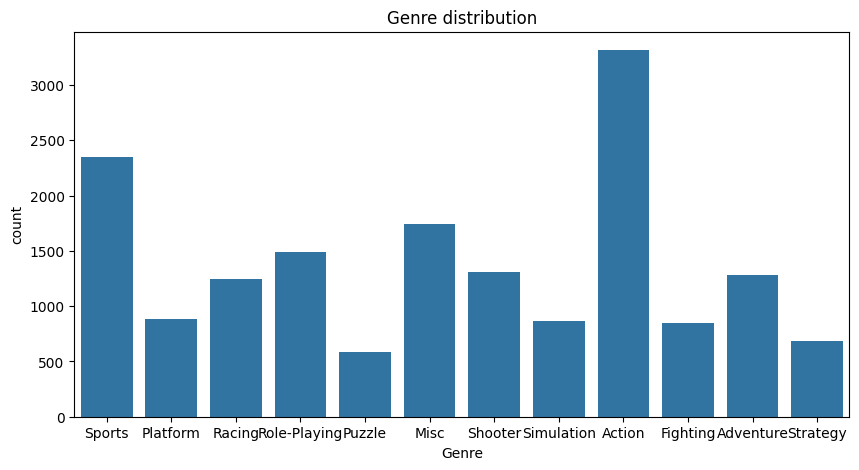

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Genre')
plt.title('Genre distribution')
plt.show()

Countplot для Genre посмотрим распределение отдельных признаков и видим, что Sports и Action представляют собой большинство наблюдений

<Axes: xlabel='Genre', ylabel='Global_Sales'>

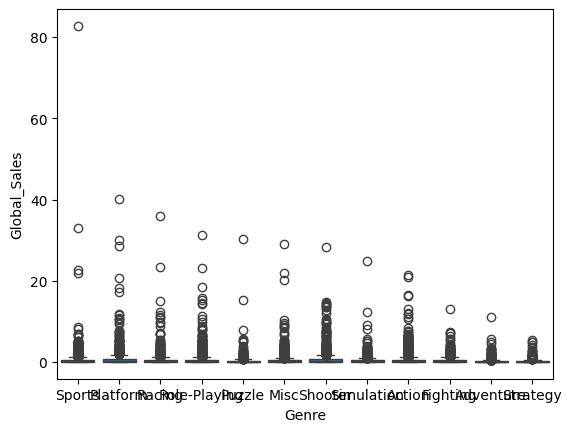

In [10]:
sns.boxplot(data=df, x='Genre', y='Global_Sales')

очень красиво, если перевернуть экран, то как тающие сосульки

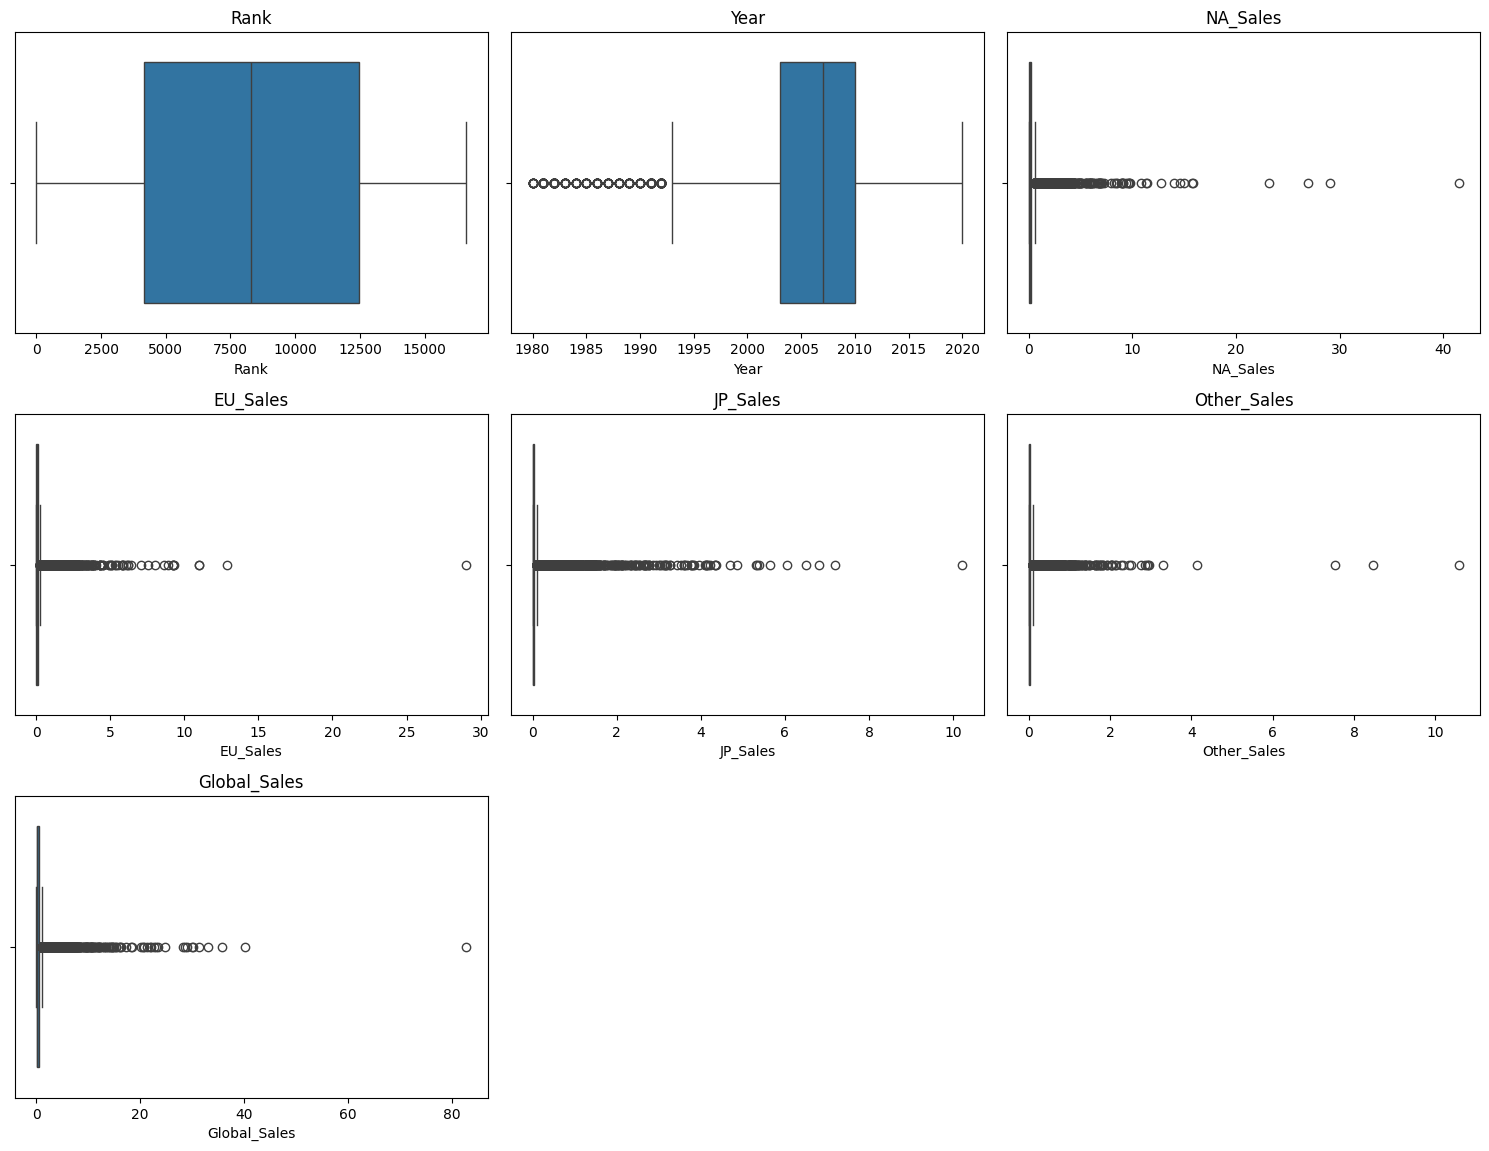

In [11]:
# Однофакторные boxplot для числовых переменных
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, x=column)
    plt.title(column)

plt.tight_layout()
plt.show()

In [12]:
df.corr()['Global_Sales']

<ipython-input-12-4f4e406f9262>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Global_Sales']


Rank           -0.427407
Year           -0.074735
NA_Sales        0.941047
EU_Sales        0.902836
JP_Sales        0.611816
Other_Sales     0.748331
Global_Sales    1.000000
Name: Global_Sales, dtype: float64

Видим, что у Global_Sales хорошая корреляция с большенсвом переменными, но  наибольшая с NA_Sales: 0.941047 и
EU_Sales: 0.902836. Это означает, что эти признаки подходят для дальнейшего анализа. Мы посмотрели их распределеиня, перекоса не заметили, значит может брать дальше.

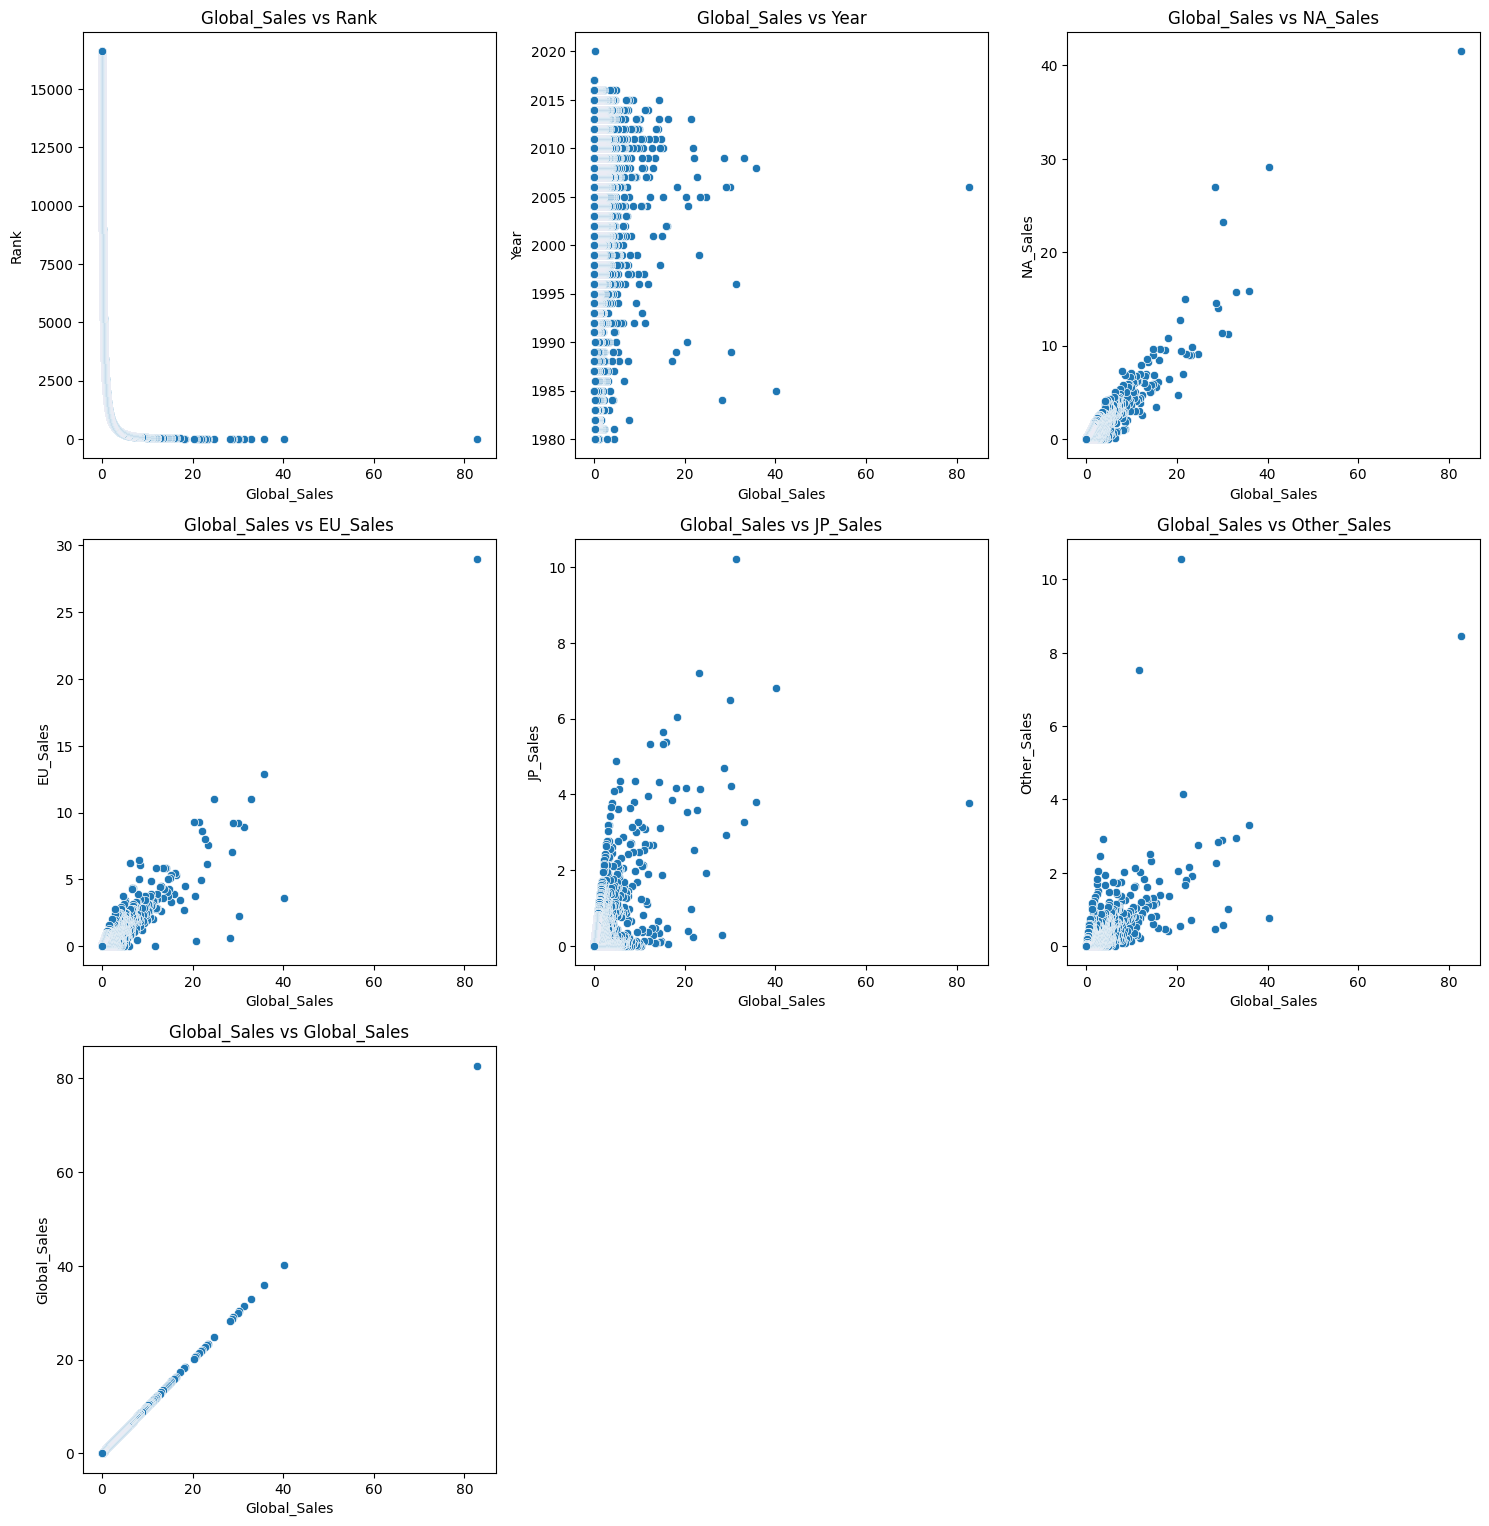

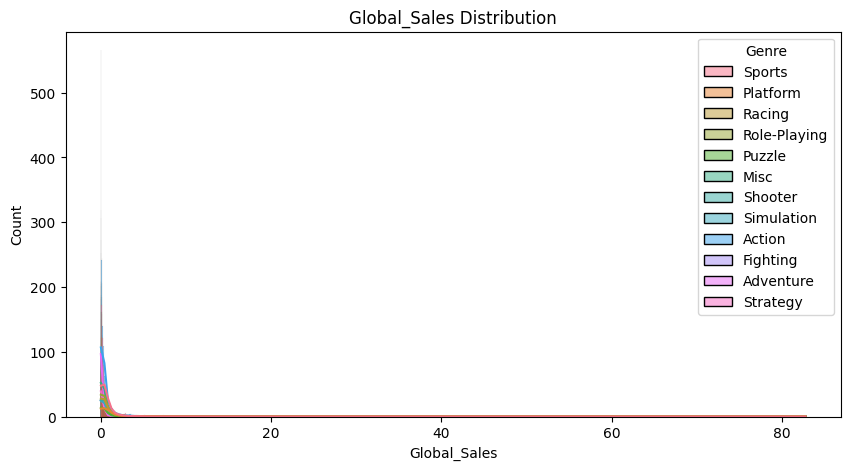

In [13]:
plt.figure(figsize=(15, 20))

# Создание диаграмм рассеивания для каждой числовой переменной относительно глобальных продаж
for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(data=df, x='Global_Sales', y=column)
    plt.title(f'Global_Sales vs {column}')

plt.tight_layout()
plt.show()

# Histplot для переменной глобальные продажи
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Global_Sales', hue='Genre', kde=True)
plt.title('Global_Sales Distribution')
plt.show()


В целом мы и так видели, что все хоошо, но отберем признаки, которые коррилируют с Global_Sales

<ipython-input-19-396e12dc75ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Global_Sales']


<Axes: >

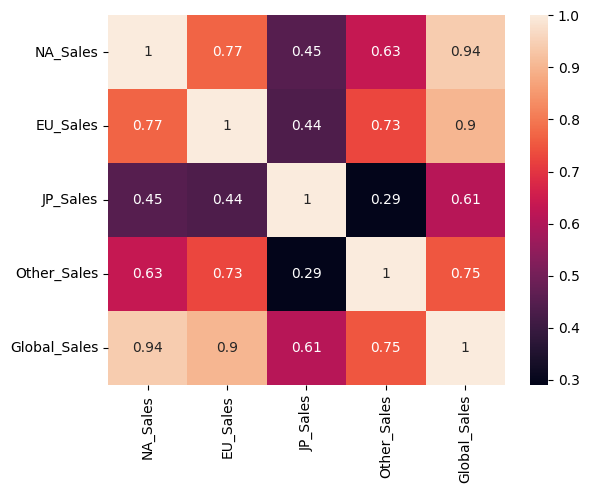

In [19]:
df.corr()['Global_Sales']

feature_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

df_features = df[feature_columns + ['Global_Sales']]

sns.heatmap(df_features.corr(), annot=True)

In [20]:
df_features

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.49,29.02,3.77,8.46,82.74
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.82
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...
16593,0.01,0.00,0.00,0.00,0.01
16594,0.01,0.00,0.00,0.00,0.01
16595,0.00,0.00,0.00,0.00,0.01
16596,0.00,0.01,0.00,0.00,0.01


### Трансформация набора данных

(OneHotEncode для категориальных переменных)

(Standard or MinMax or бининг или другое преобразование для числовых)

P.S. Целевую переменную не преобразовываем, оставляем как есть


In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def transform_dataframe(df):
    # Проверка на наличие необходимых столбцов
    required_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre']
    if not all(column in df.columns for column in required_columns):
        raise ValueError("DataFrame must contain the required columns.")

    # Создание копии DataFrame, чтобы не изменять исходный df
    df_transformed = df.copy()

    # Преобразование первых четырех признаков с помощью StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df_transformed[required_columns[:-1]])

    # Преобразование 'Genre' с помощью pd.get_dummies
    Genre_dummies = pd.get_dummies(df_transformed['Genre'], prefix='ge')

    # Объединение масштабированных признаков и dummy переменных
    df_transformed = pd.DataFrame(scaled_features, columns=required_columns[:-1])
    df_transformed = pd.concat([df_transformed, Genre_dummies], axis=1)

    return df_transformed

df_research = transform_dataframe(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre']])
pd.concat([df_research, df['Global_Sales'], ], axis=1)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ge_Action,ge_Adventure,ge_Fighting,ge_Misc,ge_Platform,ge_Puzzle,ge_Racing,ge_Role-Playing,ge_Shooter,ge_Simulation,ge_Sports,ge_Strategy,Global_Sales
0,50.480508,57.136930,11.938058,44.606085,0,0,0,0,0,0,0,0,0,0,1,0,82.74
1,35.284437,6.794188,21.767296,3.828224,0,0,0,0,1,0,0,0,0,0,0,0,40.24
2,19.084273,25.197785,12.002724,17.297115,0,0,0,0,0,0,1,0,0,0,0,0,35.82
3,18.961823,21.497277,10.353740,15.441165,0,0,0,0,0,0,0,0,0,0,1,0,33.00
4,13.476053,17.302048,32.792857,5.047848,0,0,0,0,0,0,0,1,0,0,0,0,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,-0.311841,-0.290207,-0.251492,-0.254864,0,0,0,0,1,0,0,0,0,0,0,0,0.01
16594,-0.311841,-0.290207,-0.251492,-0.254864,0,0,0,0,0,0,0,0,1,0,0,0,0.01
16595,-0.324086,-0.290207,-0.251492,-0.254864,0,0,0,0,0,0,1,0,0,0,0,0,0.01
16596,-0.324086,-0.270418,-0.251492,-0.254864,0,0,0,0,0,1,0,0,0,0,0,0,0.01


### Разделение данных

Для начала, разделить данные на X и Y

Разбить данные на тестовую и обучающую выборки

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Выборка признаков и целевой переменной
X = df_research
y = df['Global_Sales']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Обучение
#### 1 Регрессия
- Обучить линейную регрессию на тренировочных данных (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2
- Вывести и написать выводы о коэфициентах регрессии
- Написать формулу регрессии

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

#### 2 Ближайшие соседи
- Обучить KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

In [26]:
def compute_regression(X, y):
  # Создание и обучение модели линейной регрессии
  model = LinearRegression()
  model.fit(X, y)

  return model


def compute_metrics(y, predicted):
  # Оценка качества модели
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % верно угаданых)': (1 - mape) * 100,
      'mape (original - % ошибок)': mape * 100,
  }

In [27]:
model = compute_regression(X_train, y_train) # Прогнозирование на обучающей выборке (проверка на переобучение)
y_pred = model.predict(X_train)

compute_metrics(y_train, y_pred)

{'MAE': 0.0029599440338687905,
 'MSE': 2.721230632748042e-05,
 'R2': 0.9999861983327377,
 'mape (reverted - % верно угаданых)': 97.07727455494,
 'mape (original - % ошибок)': 2.922725445059994}

In [28]:
model = compute_regression(X_train, y_train) # Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

compute_metrics(y_test, y_pred)

{'MAE': 0.002959066383964963,
 'MSE': 2.7385781322801914e-05,
 'R2': 0.9999934816927368,
 'mape (reverted - % верно угаданых)': 97.15243811593817,
 'mape (original - % ошибок)': 2.8475618840618337}

In [29]:
coefficients = model.coef_
coefficients

array([ 8.16565041e-01,  5.05296867e-01,  3.09306471e-01,  1.88453057e-01,
       -3.11587938e-05, -1.69977362e-04, -2.05672109e-04,  1.14686579e-04,
        1.58576240e-04,  5.10062406e-04, -6.42258141e-05, -3.18042278e-04,
        1.10336458e-04,  1.44369654e-05, -1.39897444e-04,  2.08751537e-05])

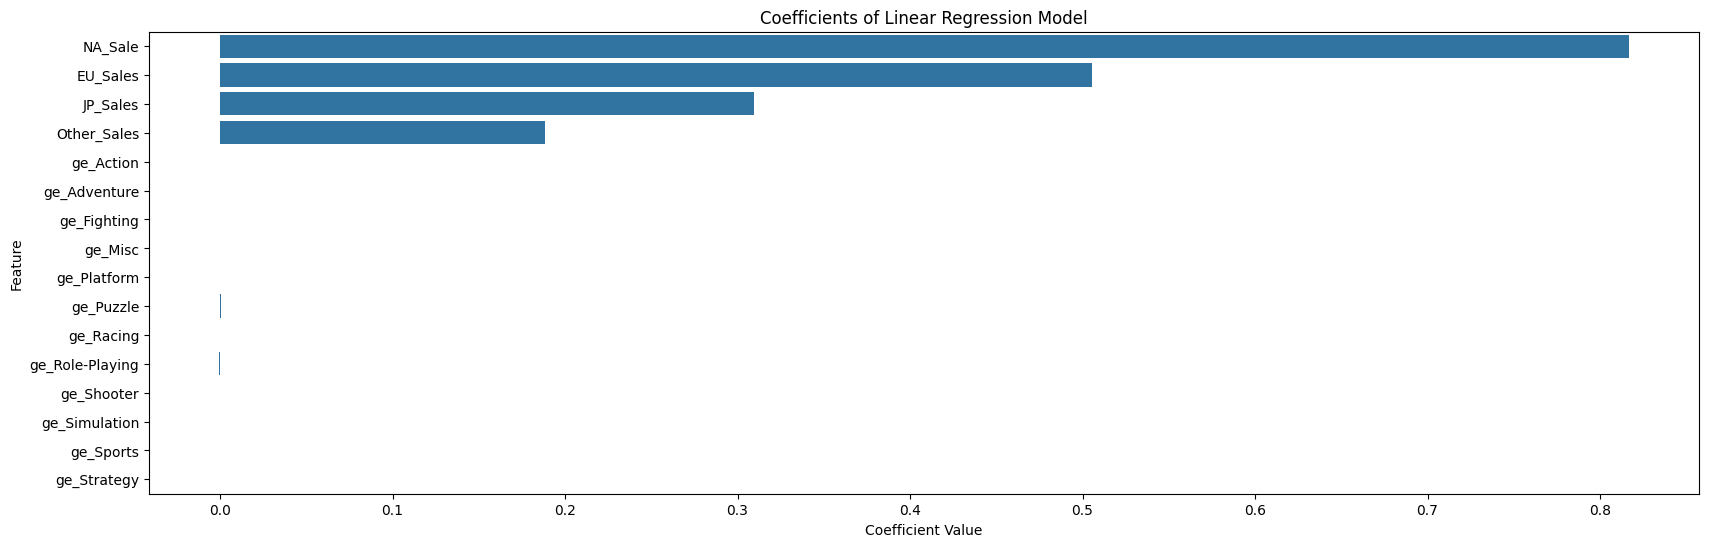

In [31]:
# Получение коэффициентов линейной регрессии
coefficients = model.coef_

# Названия признаков
feature_names = ['NA_Sale', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'ge_Action', 'ge_Adventure', 'ge_Fighting', 'ge_Misc', 'ge_Platform', 'ge_Puzzle', 'ge_Racing', 'ge_Role-Playing', 'ge_Shooter', 'ge_Simulation', 'ge_Sports', 'ge_Strategy']

# Визуализация коэффициентов
plt.figure(figsize=(20, 6))
sns.barplot(x=coefficients, y=feature_names)
plt.title('Coefficients of Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [32]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'ge_Action',
        'ge_Adventure', 'ge_Fighting', 'ge_Misc', 'ge_Platform',
        'ge_Puzzle', 'ge_Racing', 'ge_Role-Playing', 'ge_Shooter',
        'ge_Simulation', 'ge_Sports', 'ge_Strategy'], dtype=object),
 'n_features_in_': 16,
 'coef_': array([ 8.16565041e-01,  5.05296867e-01,  3.09306471e-01,  1.88453057e-01,
        -3.11587938e-05, -1.69977362e-04, -2.05672109e-04,  1.14686579e-04,
         1.58576240e-04,  5.10062406e-04, -6.42258141e-05, -3.18042278e-04,
         1.10336458e-04,  1.44369654e-05, -1.39897444e-04,  2.08751537e-05]),
 'rank_': 15,
 'singular_': array([1.70952535e+02, 9.86724857e+01, 6.58529194e+01, 5.21473705e+01,
        4.87370415e+01, 4.12177216e+01, 3.63777468e+01, 3.32349776e+01,
        3.19842012e+01, 3.16106754e+01, 2.82483430e+01, 2.63539552e+01,
        2.61732237e+01, 2.35741260e+01, 2.20845

In [33]:
import numpy as np
from collections import Counter
from sklearn.metrics.pairwise import euclidean_distances

def knn_regressor(X_train, y_train, X_test, k=5):
    """
    Простая реализация KNN регрессии.

    Параметры:
    X_train: np.array - обучающий набор признаков
    y_train: np.array - обучающий набор целевой переменной
    X_test: np.array - тестовый набор признаков
    k: int - количество соседей

    Возвращает:
    y_pred: np.array - предсказанные значения для тестового набора
    """

    # Рассчитываем метрику расстояния (для примера - Евклидово расстояние)
    #от каждой тестовой точки до всех точек обучающего набора
    distances = euclidean_distances(X_test, X_train)

    # Инициализация массива для предсказаний
    y_pred = np.zeros(len(X_test))

    # Цикл по всем тестовым точкам
    for i in range(0, len(X_test)):
      test_point = X_test.iloc[i].to_numpy()
      neighbors = np.argsort(distances[i])[:k]
      y_pred[i] = np.mean(y_train[neighbors])

    return y_pred

# Пример использования функции:
# X_train, y_train, X_test уже должны быть определены


y_pred = knn_regressor(X_train, y_train.to_numpy(), X_test, k=3)
compute_metrics(y_test, y_pred)

{'MAE': 0.05530321285140563,
 'MSE': 0.8804417402945112,
 'R2': 0.7904390704470979,
 'mape (reverted - % верно угаданых)': 93.08023544999777,
 'mape (original - % ошибок)': 6.919764550002226}

##Задание для гениев*

Удачи 😈

В практике есть примеры реализации ```linear_regression``` и ```knn_regressor```, но есть нюанс... Сейчас ни linear_regression, ни knn_regressor не поддерживают сохранения состояния для последующего возможного использования.

Необходимо - реализовать два класса LinearRegression и KNNRegression (примеры обучения моделек есть). В этих классах обязатльно должны быть два метода
```
.fit(X: np.array, y: np.array) -> None - обучить модель и сохранить внутреннее состояние модели
.predict(X) -> np.array - предсказать y на основе X
```
При инициализации класса - передавать параметры модели в момент инициализации. Например:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

В качестве тестов можно использовать KNN и LinearRegression из sklearn, результат работы ваших объектов должен примерно совпадать с результатами работы объектов из sklearn

В результате работы сделать сравнение с теми же данными в sklearn

In [ ]:
"""
Результат работы
"""